In [3]:
%matplotlib inline

In [12]:
import numpy as np
from astropy.io import ascii
from astropy.table import vstack
import matplotlib.pyplot as plt

In [5]:
objlist = ['B1-a','B1-c','B335','BHR71','L1014','L1157','L1551-IRS5','RCrA-IRS5A',
           'RCrA-IRS7B','RCrA-IRS7C','TMC1','TMC1A','TMR1','WL12']

In [13]:
cdfdir = '/Users/yaolun/data/CDF_archive/'
data_pacs = ascii.read(cdfdir+'CDF_archive_pacs_1d_lines.txt')
data_spire = ascii.read(cdfdir+'CDF_archive_spire_1d_lines.txt')
data = vstack([data_pacs, data_spire])

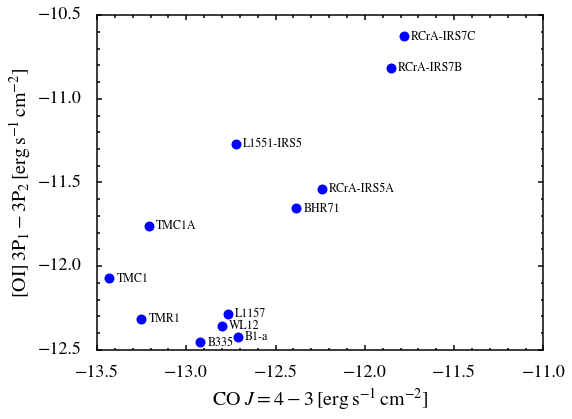

In [45]:
data_valid = data[(data['Validity'] == 1)]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for obj in objlist:
    # xdata = CO4-3, ydata = OI
    xdata = data_valid['Str(W/cm2)'][(data_valid['Object'] == obj) & 
                                     (data_valid['SNR'] >= 3.0) &
#                                      (data_valid['Pixel_No'] == 'c') &
                                     (data_valid['Line'] == 'CO4-3')]
    ydata = data_valid['Str(W/cm2)'][(data_valid['Object'] == obj) & 
                                     (data_valid['SNR'] >= 3.0) &
#                                      (data_valid['Pixel_No'] == 'c') &
                                     (data_valid['Line'] == 'OI3P1-3P2')]
    if (len(xdata) != 0) and (len(ydata) != 0):
        xdata = np.log10(xdata*1e7)
        ydata = np.log10(ydata*1e7)
        ax.plot(xdata, ydata, 'bo', mec='None', markersize=10)
        ax.annotate(obj, xy=(xdata,ydata), xytext=(xdata+0.04, ydata-0.02), fontsize=12)

ax.set_xlabel(r'$\rm{CO}\,\,\it{J}\rm{=4-3\,[erg\,s^{-1}\,cm^{-2}]}$',fontsize=20)
ax.set_ylabel(r'$\rm{[OI]\,3P_{1}-3P_{2}\,[erg\,s^{-1}\,cm^{-2}]}$',fontsize=20)
ax.set_xlim([-13.5, -11])
# ax.set_ylim([-12.8,-10])
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)
    
fig.savefig('/Users/yaolun/test/co43_oi.pdf', format='pdf', bbox_inches='tight', dpi=300)